### [Forecasting : principles and practice](https://otexts.com/fpp2/)

# Ch2. Time series graphics

### 1. Time series in R

1) ts objects 
   - A time series is stored in ts object in R:
     - a list of numbers.
     - information about times those numbers were recorded.
   - *ts(data, frequency, start)* 
   
| Type of data | frequency | start example |
|:---|:---:|---:|
| Annual | 1 | 1995 |
| Quarterly | 4 | c(1995,2) |
| Monthly | 12 | c(1995,9) |
| Daily | 7 or 365.25 | 1 or c(1995,234) |
| Weekly | 52.18 | c(1995,23) |
| Hourly | 24 or 168 or 8766 | 1 |
| Half-hourly | 48 or 336 or 17532 | 1 |

In [1]:
```{r include=T}
a <- ts(c(123,39,78,52,110), start=2012)
b <- ts(c(1,4,3,6,7,8,4,6,2,3,4,5,7,8,5,4,3,2), frequency=12, start=c(2003,1)) # 관측주기가 12개월이며 2003년 1월부터 시작
```

ERROR: Error in parse(text = x, srcfile = src): 길이가 0인 변수명을 사용하려고 시도했습니다


2) *fpp2* package
   - *forecast* package (for forecasting functions)
   - *ggplot2* package (for graphics functions)
   - *fma* package (for lots of time series data)
   - *expsmooth* package (for more time series data)

In [2]:
# install.packages("fpp2")
library(fpp2)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: forecast
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff
Loading required package: fma
Loading required package: expsmooth


-------------------------------------------------

### 2. Time plots; *autoplot*

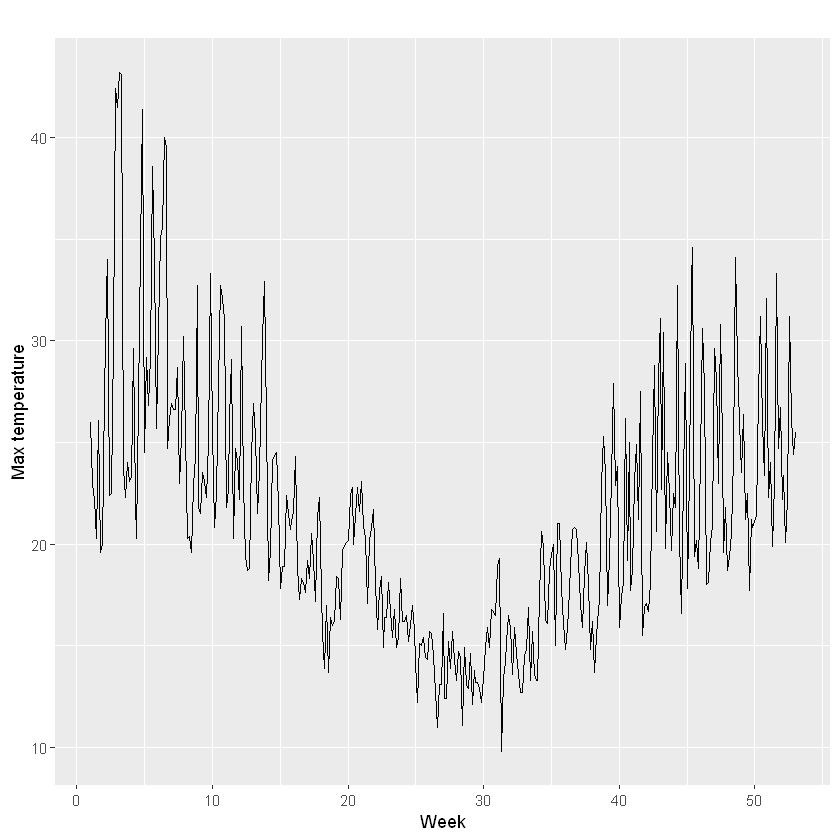

In [3]:
autoplot(elecdaily[,"Temperature"]) + xlab("Week") + ylab("Max temperature")

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


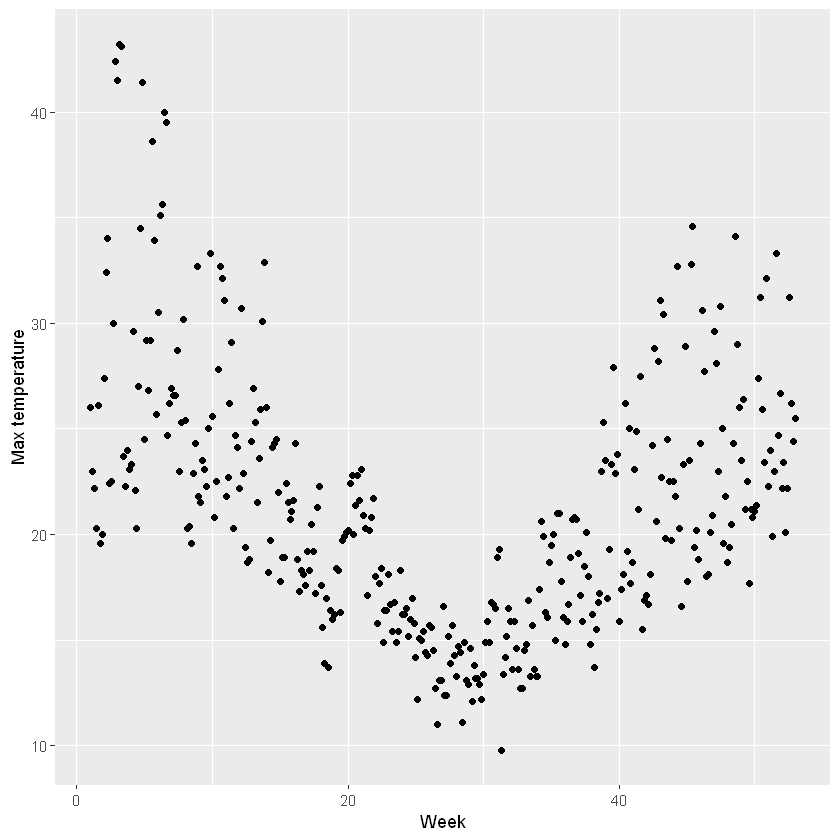

In [4]:
qplot(time(elecdaily), elecdaily[,"Temperature"]) + xlab("Week") + ylab("Max temperature")

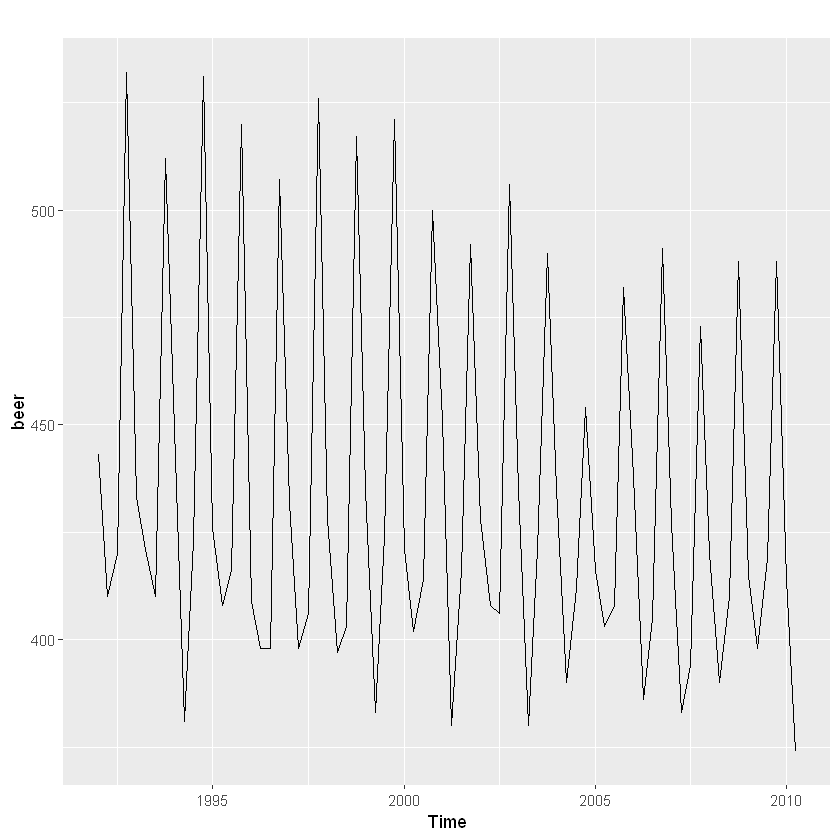

In [5]:
beer <- window(ausbeer, start=1992) # window : data의 start와 보고자 하는 start가 다른 경우
autoplot(beer)

--------------------

### 3. Seasonal plots

1) seasonal plots; *ggseasonplot*
   - Enables the underlying seasonal pattern to be seen more clearly, and also allows any substantial departures from **the seasonal pattern to be easily identified.**

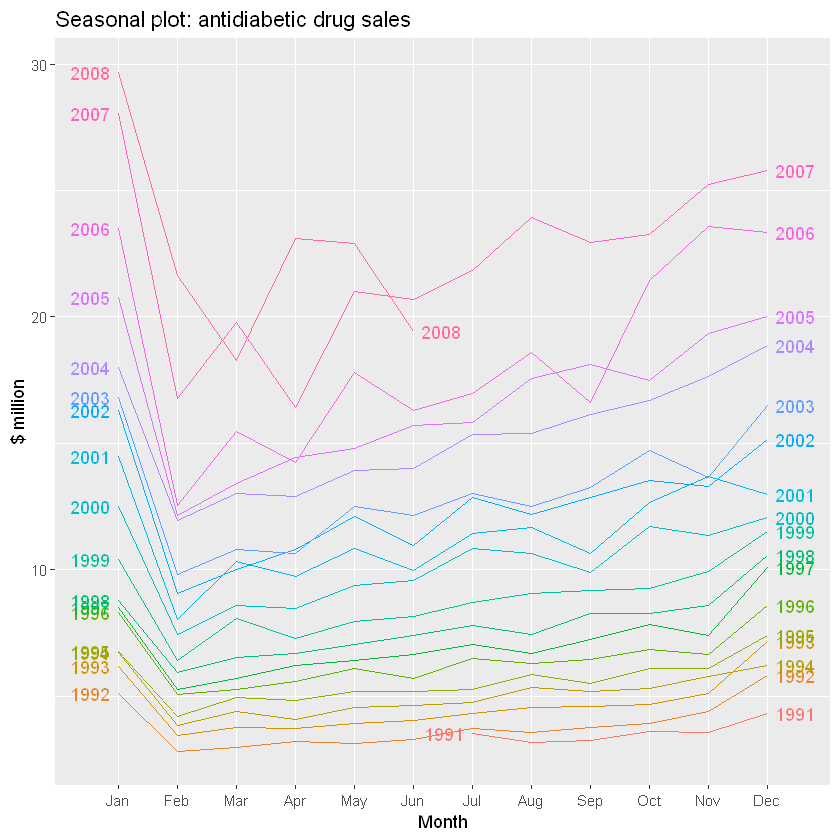

In [6]:
ggseasonplot(a10, year.labels=T, year.labels.left=T) + ylab("$ million") + ggtitle("Seasonal plot: antidiabetic drug sales")

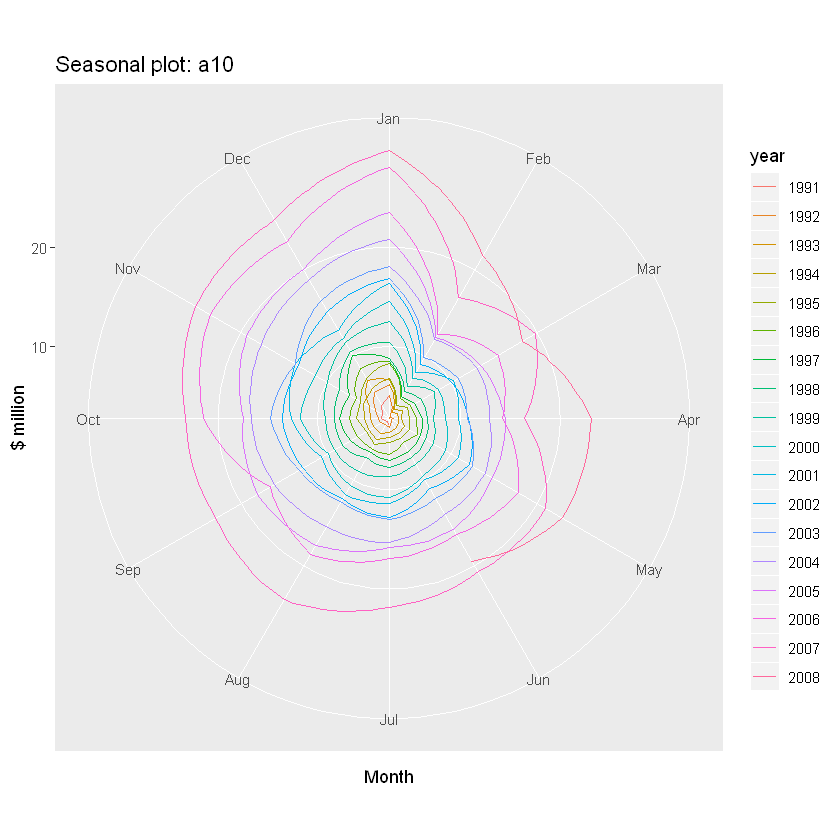

In [7]:
ggseasonplot(a10, polar=T) + ylab("$ million")

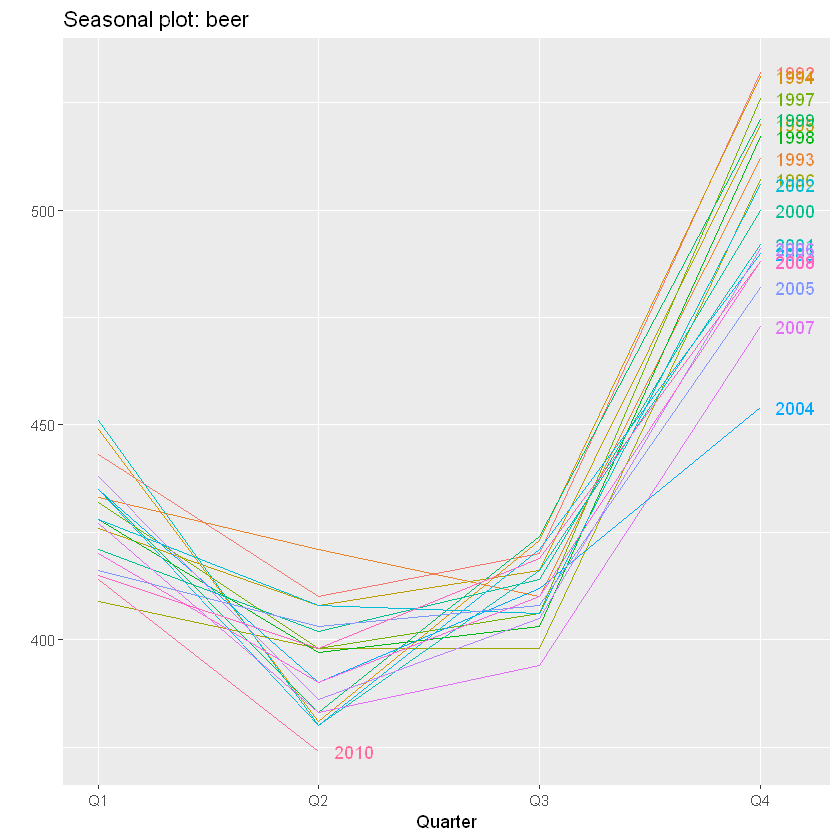

In [8]:
ggseasonplot(beer, year.labels=T)

2) seasonal subseries plots; *ggsubseriesplot*

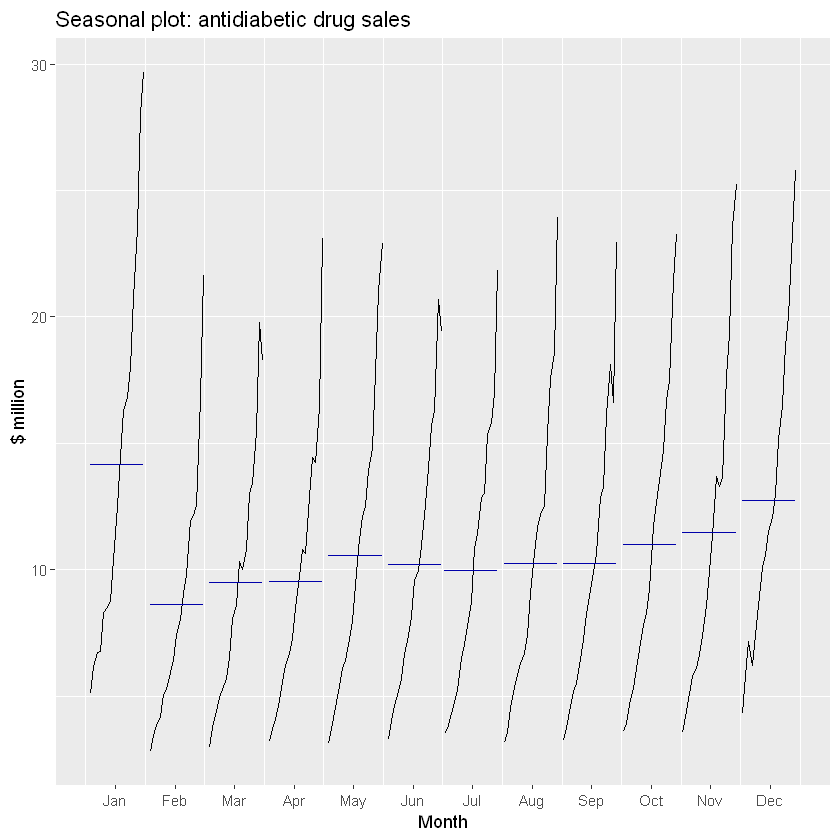

In [9]:
ggsubseriesplot(a10)  + ylab("$ million") + ggtitle("Seasonal plot: antidiabetic drug sales")

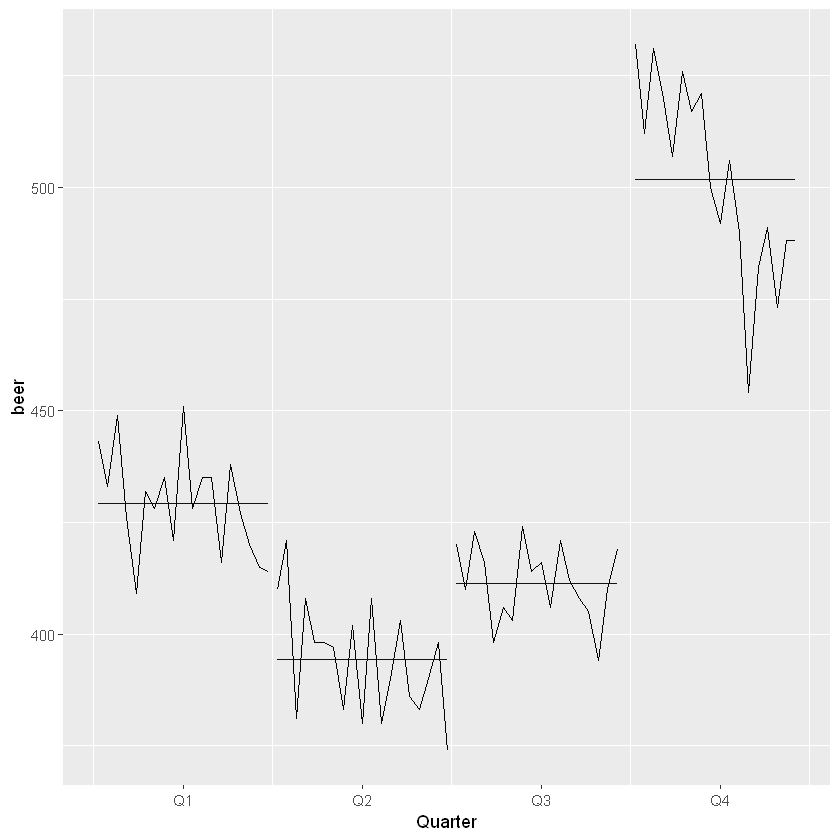

In [10]:
ggsubseriesplot(beer)

--------------------

### 4. Seasonal or cyclic?

1) Time series components
   - **Trend** : pattern exists when there is a **long-term linear increase or decrease** in the data.
   - **Seasonal** : pattern exists when a series in influenced by **seasonal factors.** (e.g., the quarter of the year, the month, or day of the week).
   - **cyclic** : pattern exists when data exhibit rises and falls that are not of fixed period (duration usually of at least 2 years). *주기가 일정하지 않고 불명확한 요소가 많기 때문에 모델링 하기 어려움*

2) Differences between seasonal and cyclic patterns
   - seasonal pattern constant length; cyclic pattern variable length
   - average length of cycle longer than length of seasonal pattern
   - magnitude of cycle more variable than magnitude of seasonal pattern
> The timing of peaks and troughs is **predictable with seasonal data**, but **unpredictable in the long term with cyclic data**.

3) time series patterns

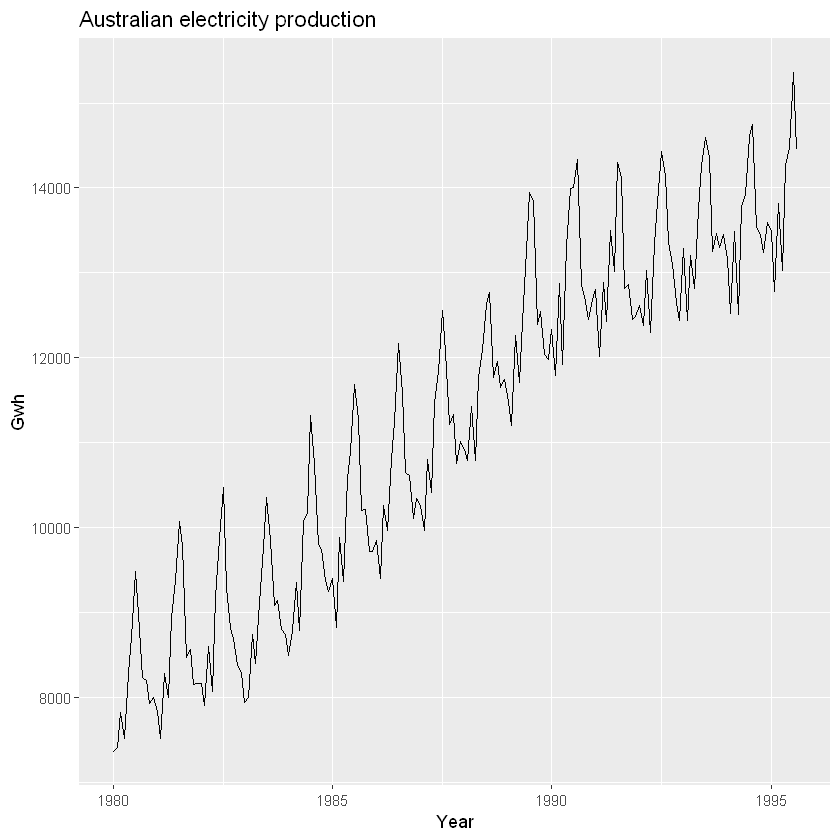

In [11]:
autoplot(window(elec, start=1980)) + ggtitle("Australian electricity production") + xlab("Year") + ylab("Gwh") # seasonal + trend

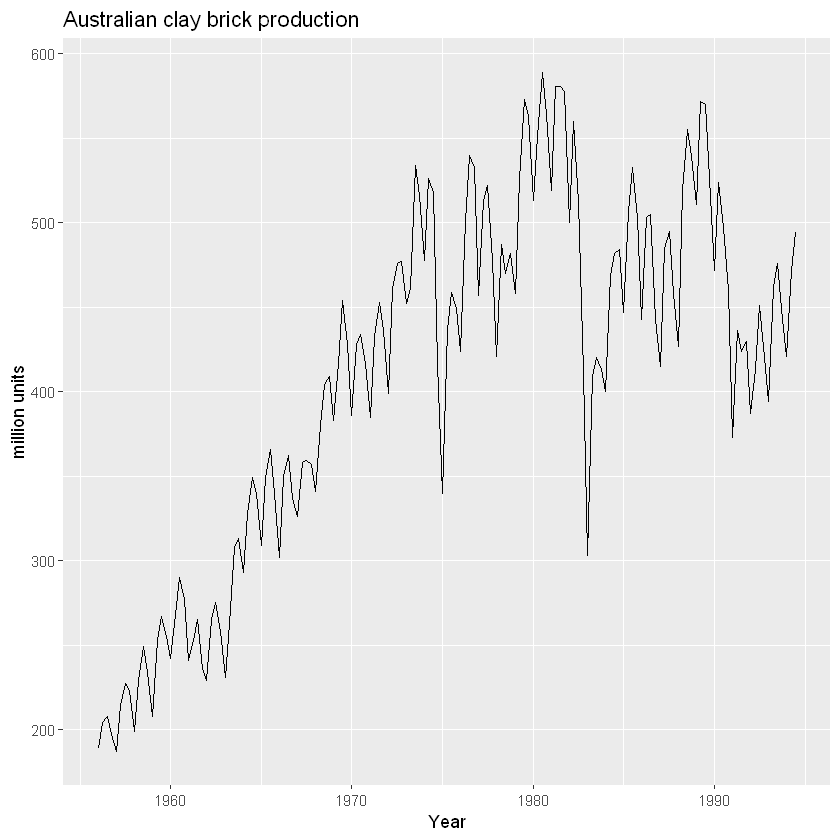

In [12]:
autoplot(bricksq) + ggtitle("Australian clay brick production") + xlab("Year") + ylab("million units") # trend 있다가 없어짐

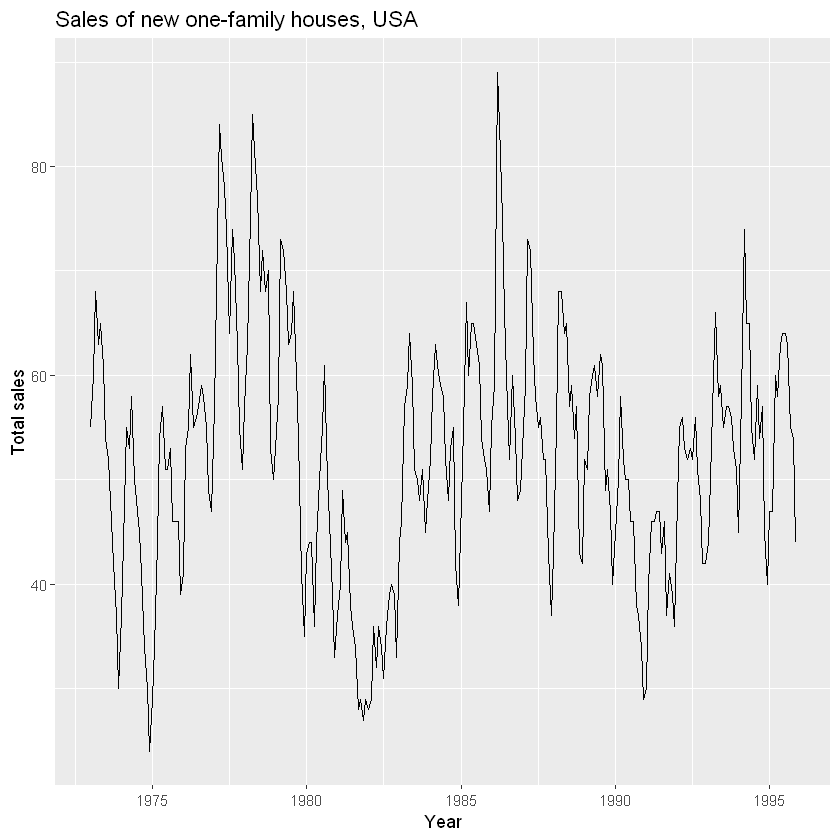

In [13]:
autoplot(hsales) + ggtitle("Sales of new one-family houses, USA") + xlab("Year") + ylab("Total sales") # seasonal + trend + cyclic

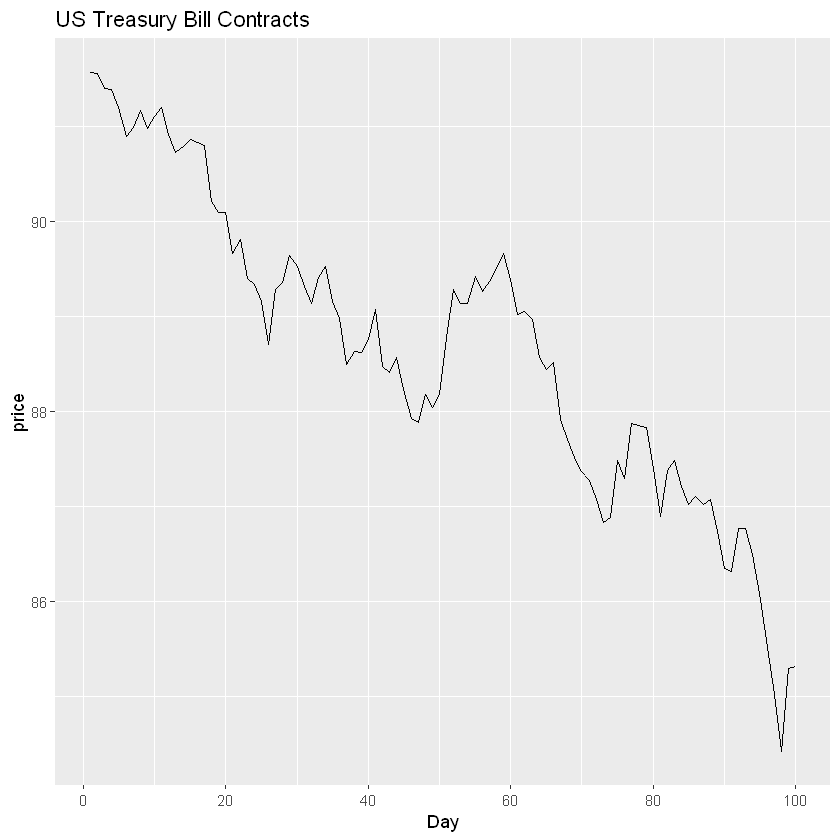

In [14]:
autoplot(ustreas) + ggtitle("US Treasury Bill Contracts") + xlab("Day") + ylab("price") # trend

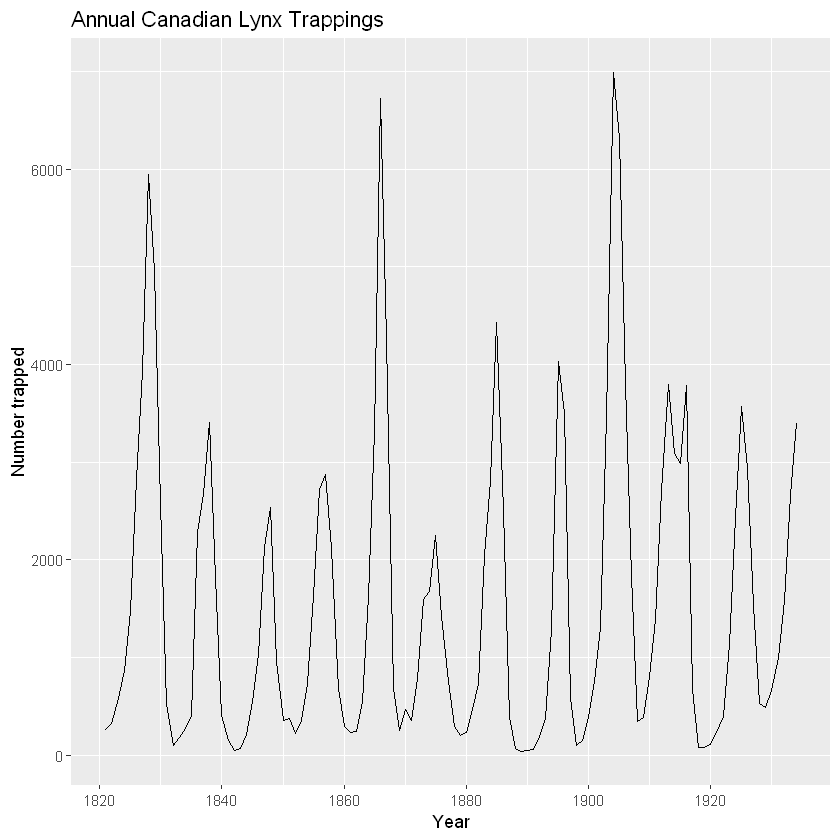

In [15]:
autoplot(lynx) + ggtitle("Annual Canadian Lynx Trappings") + xlab("Year") + ylab("Number trapped") # cyclic

--------------------------------

### 5. Lag plots and autocorrelation (시차그림과 자기상관그림)

1) lagged scatterplots; *gglagplot*
   - Each graph shows $y_t$ plotted against $y_{t+k}$ for different values of k.
     - lag1 : $(y_t, y_{t+1})$; (y축, x축) 
        - Quarter1 : $(y_1, y_2), (y_5, y_6), (y_9, y_{10}), \dots $
        - Quarter2 : $(y_2, y_3), (y_6, y_7), (y_{10}, y_{11}), \dots $
        - Quarter3 : $(y_3, y_4), (y_7, y_8), (y_{11}, y_{12}), \dots $
        - Quarter4 : $(y_4, y_5), (y_8, y_9), (y_{12}, y_{13}), \dots $
     - lag2 : $(y_t, y_{t+2})$
     - lag3 : $(y_t, y_{t+3})$
     - lag4 : $(y_t, y_{t+4})$; 4분기
   - The autocorrelations are the correlations associated with these scatterplots.

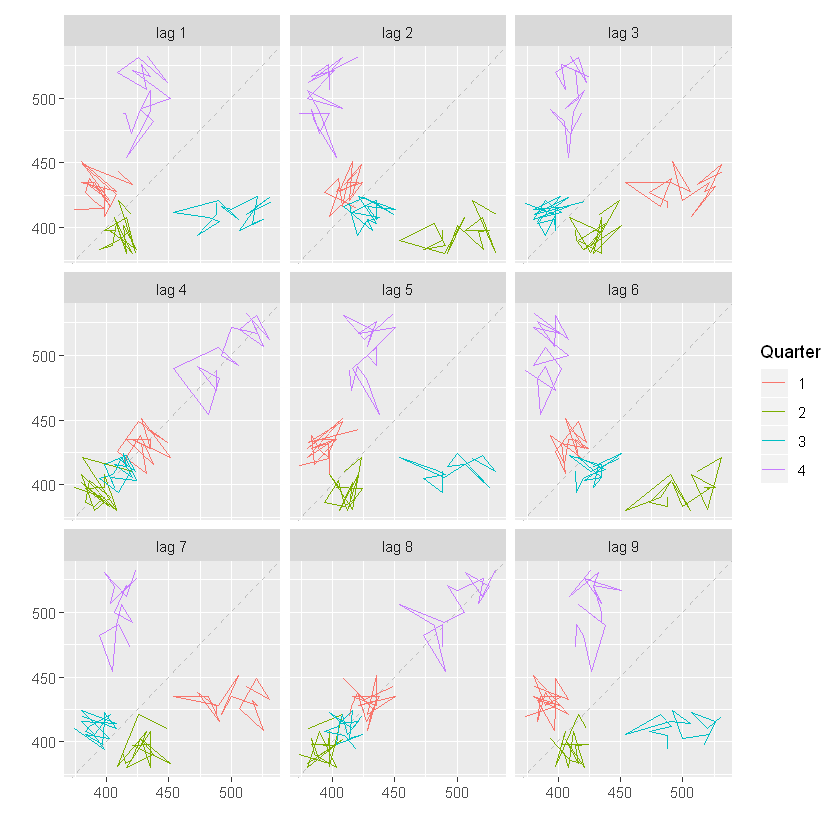

In [3]:
beer <- window(ausbeer, start=1992)
gglagplot(beer)

2) Autocorrelation; *ggAcf*
   - **Covariace** and **correlation** : measure extent of **linear relationship** between two variables ($y$ and $x$).
   - **Autocovariance** and **autocorrelation** by $\mathbf{\rho}$ : measure linear relationship between **lagged values** of a time series $y$.
     - We measure the relationship between $(y, y_{t-1}), (y, y_{t-2}), (y, y_{t-3}), \dots $

   - The **sample autocovariance** at lag k by $\mathbf{c_k}$ and the **sample autocorrelation** at lag k by $\mathbf{r_k}$
     $$c_k = \frac{1}{T} \sum_{t=k+1}^T (y_t-\overline{y})(y_{t-k}-\overline{y}), {\scriptstyle\text{분모는 T-k 대신 T}}$$ and $$r_k = \hat{\rho_k} = \frac{c_k}{c_0}$$
     - $r_1$ indicates how successive values of $y$ relate to each other.
     - $r_2$ indicates how $y$ values two periods apart relate to each other.
     - $r_k$ is almost the same as the sample correlation between $y_t$ and $y_{t-k}$

   - The autocorrelations at lags $1,2, \dots$ make up the autocorrelation or **ACF**.
     - The plot is known as a **correlogram**.
     - When data have a **trend**, the autocorrelations for small lags tend to be large and positive and **slowly decrease** as the lags increase.
     - When data have a **seasonal**, the autocorrelations will be larger at the **seasonal lags**. 
     - When data have a trend and seasonal, you see a combination of these effects.

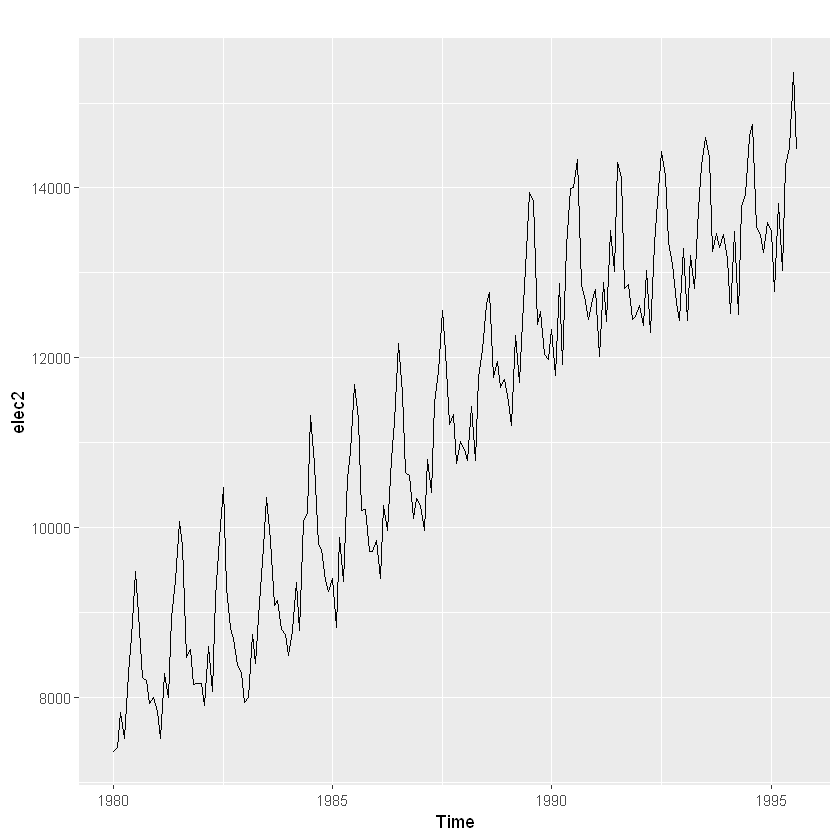

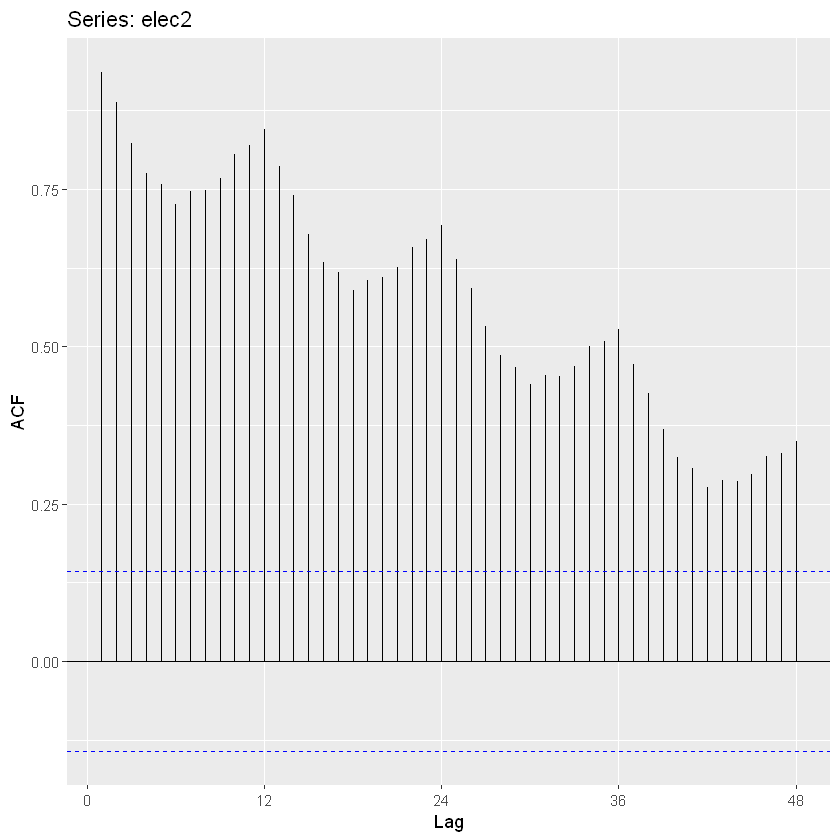

In [6]:
elec2 <- window(elec, start=1980) # trend & seasonal
par(mfrow = c(2,1))
autoplot(elec2)
ggAcf(elec2, lag.max=48)

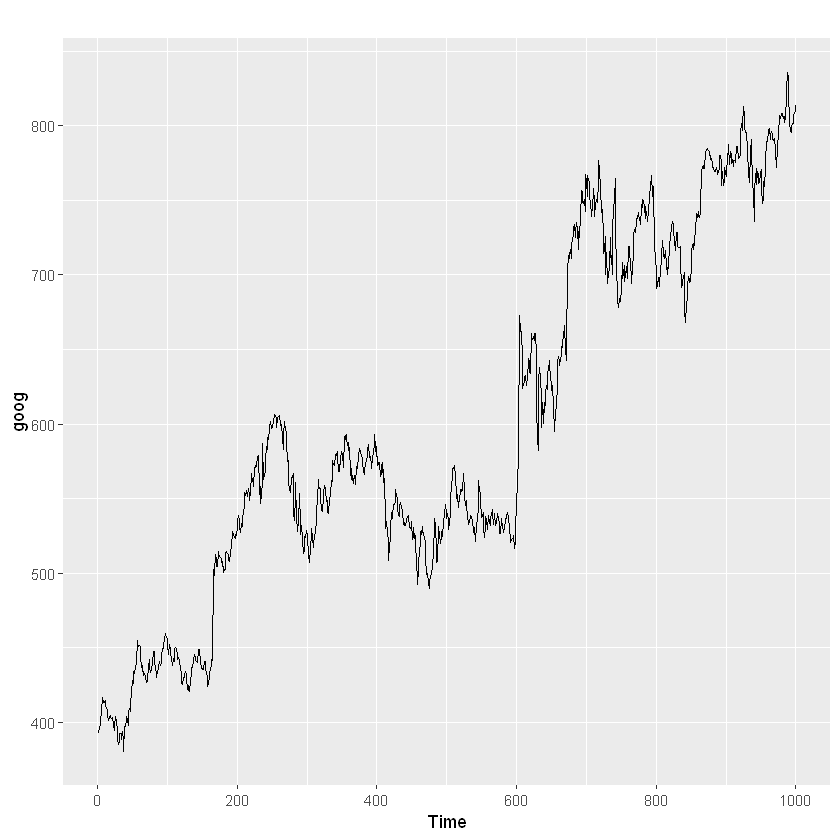

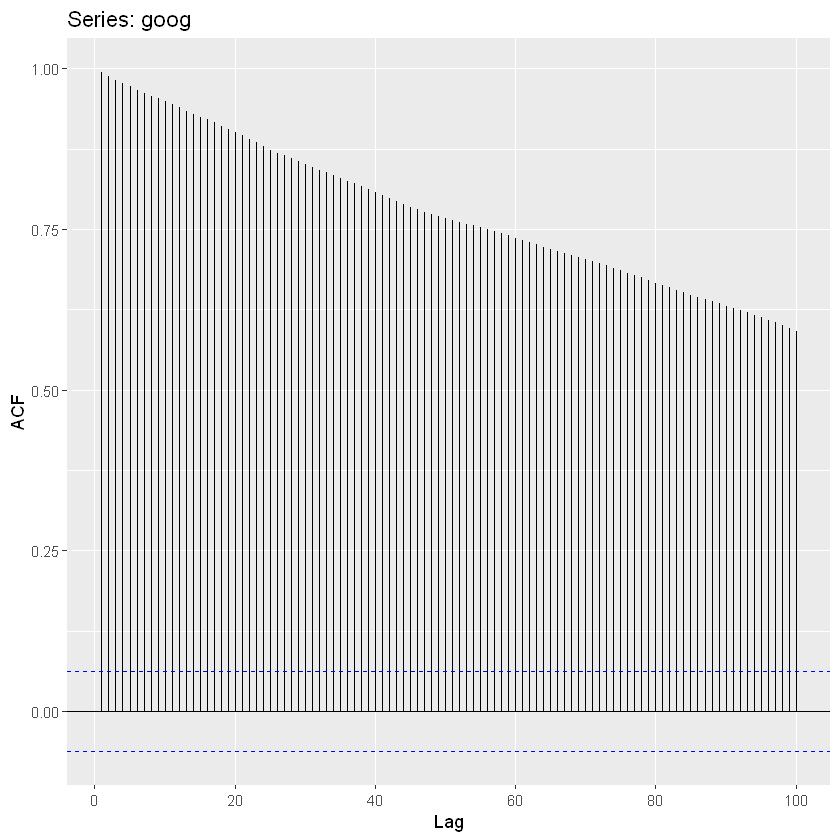

In [7]:
par(mfrow = c(2,1)) 
autoplot(goog) # trend
ggAcf(goog, lag.max=100)

-----------------------------

### 6. White noise (백색잡음)

1) Definition
   $$y_t \sim \text{WN}(0,\sigma^2) \iff  y_t : \text{uncorrelated} \\
   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ E[y_t] = 0 \\
   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ var[y_t] = \sigma^2$$

2) Hypothesis test
   - parameter : $\rho = corr(y_t, y_{t-k})$
   - hypothesis : $H_0 : \rho_k = 0  ~~~(k=1,2, \dots)$
   - statistic : $\sqrt{T}(r_k-0) \overset{\underset{\mathrm{.}}{}}{\sim} \text{N}(0,1)   \Rightarrow  r_k \overset{\underset{\mathrm{.}}{}}{\sim} \text{N}(0, \frac{1}{T})$   under $H_0$ 
   - critical values : $P \left( \frac{-1.96}{\sqrt{T}}< r_k < \frac{1.96}{\sqrt{T}} \right) = 0.95$   under $H_0$ 

3) critical values
   - common to plot lines at $\frac{\pm1.96}{\sqrt{T}}$ when plotting ACF. these are the critical values.

> For $H_0 : \rho_k=0$, Reject $H_0$(White nioise)   if $|r_k| > \frac{1.96}{\sqrt{T}}$

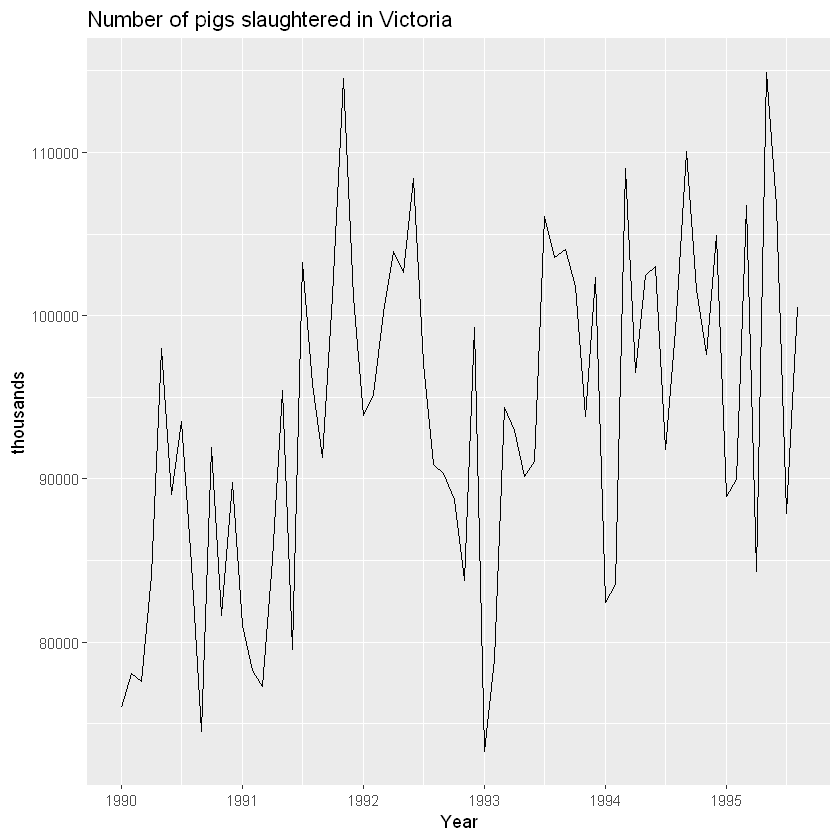

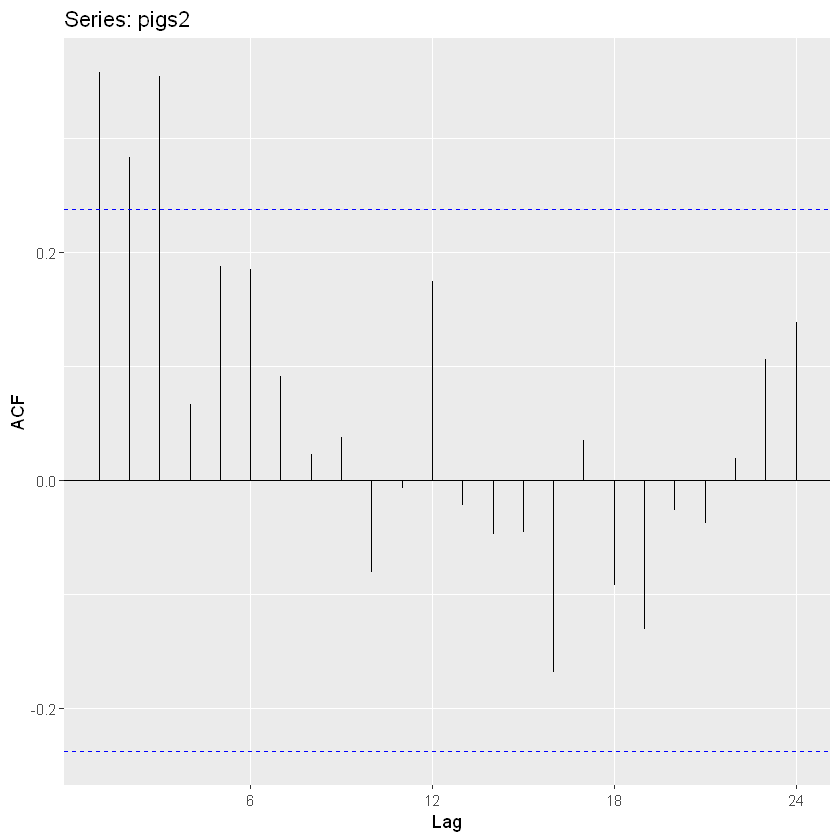

In [10]:
pigs2 <- window(pigs, start=1990)
par(mfrow = c(2,1))
autoplot(pigs2) + xlab("Year") + ylab("thousands") + 
ggtitle("Number of pigs slaughtered in Victoria")
ggAcf(pigs2)
# some sigificant autocorrelation at lags 1,2,3
# $r_12$ relatively large although not significant. 
# This may indicate some slight seasonality.
### Not a white noise series